### HDR: Graph Formation

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
# import pygraphviz as pgv
import scipy as sp
import seaborn

%matplotlib inline

#### Settings

In [2]:
year_s = 2010
year_f = 2016
years = list(np.arange(year_s, year_f+1))

period = f'{year_s}_{year_f}'

mean_type = 'mean'  # ['mean', 'median', 'wmean']

#### Set input/output folder

In [11]:
data_d_in  =  '../data/HDR_2b_max_min_l1_distances'
data_w_in  = f'../data/HDR_3_nn_2b_weights_analysis'
data_mt    =  '../data/HDR_mutual_attributes_and_countries'

data_out   = f'../data/HDR_4a_graph_formation/{mean_type}'
if not os.path.exists(data_out):
    os.makedirs(data_out)
    
plot_out = f'../plots/HDR_4a_graph_formation/{mean_type}'
if not os.path.exists(plot_out):
    os.makedirs(plot_out)

#### Read input data

##### Mutual attributes (2010-2016)

In [4]:
attr = pd.read_csv(f'{data_mt}/attributes_{period}.csv', header=None)
attr = list(attr[0])

print('Total attributes:', len(attr))

Total attributes: 98


##### Mutual countries (2010-2016)

In [5]:
cntr = pd.read_csv(f'{data_mt}/countries_{period}.csv', header=None)
cntr = list(cntr[0])

print('Total countries:', len(cntr))

Total countries: 195


##### Weights

In [12]:
w_df = pd.read_csv(f'{data_w_in}/{mean_type}_rel.csv',
                   index_col='[Dimension] Attribute')
w_df[::10]

2010      2011  \
[Dimension] Attribute                                                    
[Demography] Old age dependency ratio (old age ...  1.518044  0.896166   
[Education] Expected years of schooling, male (...  0.430062  1.786029   
[Education] Population with at least some secon...  0.670125  0.880347   
[Gender] Contraceptive prevalence, any method (...  1.373330  0.386703   
[Gender] Share of seats in parliament (% held b...  0.877625  1.059050   
[Health] Life expectancy at birth, male (years)     0.372122  1.314331   
[Income_composition of resources] Gross fixed c...  0.605265  0.388513   
[Inequality] Inequality-adjusted life expectanc...  0.643007  0.616031   
[Socio-economic sustainability] Skilled labour ...  1.082396  0.564889   
[Work, employment and vulnerability] Labour for...  0.430148  0.663599   

                                                        2012      2013  \
[Dimension] Attribute                                                    
[Demography] Old age dependency ratio (old age ...  1.586744  1.659756   
[Education] Expected years of schooling, male (...  1.072971  0.600268   
[Education] Population with at least some secon...  0.445422  0.802172   
[Gender] Contraceptive prevalence, any method (...  0.664637  0.778151   
[Gender] Share of seats in parliament (% held b...  1.004289  0.513844   
[Health] Life expectancy at birth, male (years)     0.754668  0.539883   
[Income_composition of resources] Gross fixed c...  0.511664  1.941437   
[Inequality] Inequality-adjusted life expectanc...  1.199956  0.466290   
[Socio-economic sustainability] Skilled labour ...  0.569040  0.588199   
[Work, employment and vulnerability] Labour for...  0.975361  0.633236   

                                                        2014      2015  \
[Dimension] Attribute                                                    
[Demography] Old age dependency ratio (old age ...  2.266932  2.725095   
[Education] Expected years of schooling, male (...  0.698197  0.600375   
[Education] Population with at least some secon...  1.155176  0.569765   
[Gender] Contraceptive prevalence, any method (...  0.638411  0.965922   
[Gender] Share of seats in parliament (% held b...  0.931075  0.761370   
[Health] Life expectancy at birth, male (years)     0.828155  0.502302   
[Income_composition of resources] Gross fixed c...  1.349652  1.926033   
[Inequality] Inequality-adjusted life expectanc...  0.724214  0.542962   
[Socio-economic sustainability] Skilled labour ...  0.443867  0.757847   
[Work, employment and vulnerability] Labour for...  0.712941  0.698613   

                                                        2016  
[Dimension] Attribute                                         
[Demography] Old age dependency ratio (old age ...  1.729907  
[Education] Expected years of schooling, male (...  0.450869  
[Education] Population with at least some secon...  0.694856  
[Gender] Contraceptive prevalence, any method (...  0.659726  
[Gender] Share of seats in parliament (% held b...  1.392481  
[Health] Life expectancy at birth, male (years)     0.955624  
[Income_composition of resources] Gross fixed c...  2.395894  
[Inequality] Inequality-adjusted life expectanc...  0.442546  
[Socio-economic sustainability] Skilled labour ...  0.481005  
[Work, employment and vulnerability] Labour for...  0.536056

##### Distances

In [13]:
dist_dict = dict()

for year in years:
    dist_dict[year] = pd.read_csv(f'{data_d_in}/{year}.csv',
                                  index_col='Country1_Country2')[attr] \
                        .drop('Human Development Index (HDI)', axis=1)
    
    print(year, dist_dict[year].shape)

2010 (18915, 97)
2011 (18915, 97)
2012 (18915, 97)
2013 (18915, 97)
2014 (18915, 97)
2015 (18915, 97)
2016 (18915, 97)


#### Weight-matrix formation

In [14]:
dist_dict[2010].isna().sum().sum() + (dist_dict[2010].isna() ^ True).sum().sum()

1834755

In [15]:
dist_dict[2010].shape[0] * dist_dict[2010].shape[1]

1834755

In [16]:
w_mtx = dict()

for year in years:
    w_mtx[year] = pd.DataFrame(np.zeros((len(cntr), len(cntr))),
                               columns=cntr, index=cntr)
    
    l1_dist = ((dist_dict[year] * w_df[f'{year}']).sum(axis=1) / 
              ((dist_dict[year].isna() ^ True) * w_df[f'{year}']).sum(axis=1))
    
    for i in l1_dist.index:
        c1, c2 = i.split('_')
        
        w_mtx[year].at[c1, c2] = l1_dist[i]
        w_mtx[year].at[c2, c1] = l1_dist[i]
        
    print(year, w_mtx[year].shape)

2010 (195, 195)
2011 (195, 195)
2012 (195, 195)
2013 (195, 195)
2014 (195, 195)
2015 (195, 195)
2016 (195, 195)


In [17]:
for year in years:
    w_mtx[year].to_csv(f'{data_out}/l1_{year}.csv', index_label='Country')

#### Heatmaps

In [18]:
for year in years:
    print(f'Year {year} ...', end=' ')
    plt.figure(figsize=(100, 100))
    seaborn.heatmap(w_mtx[year], cmap='Oranges')
    plt.title(f'{year}')
    plt.savefig(f'{plot_out}/hmap_{year}')
    plt.close()
#     plt.show()
    print('Done!')

Year 2010 ... Done!
Year 2011 ... Done!
Year 2012 ... Done!
Year 2013 ... Done!
Year 2014 ... Done!
Year 2015 ... Done!
Year 2016 ... Done!


#### Output graphs to gexf format

In [19]:
for year in years:
    nx.write_gexf(nx.Graph(w_mtx[year]), f'{data_out}/l1_{year}.gexf')

<hr style="height: 5px;" />

##### Example: Countries of Interest

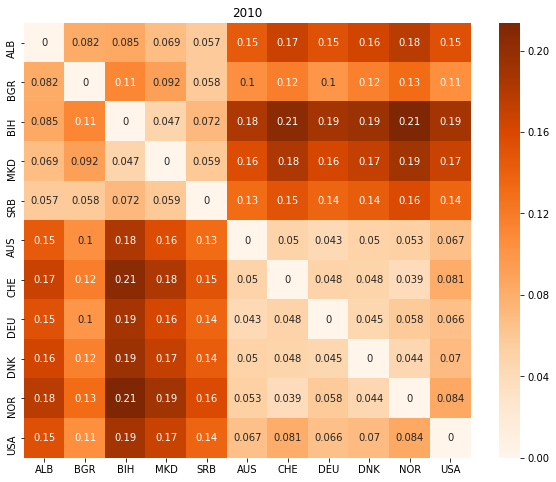

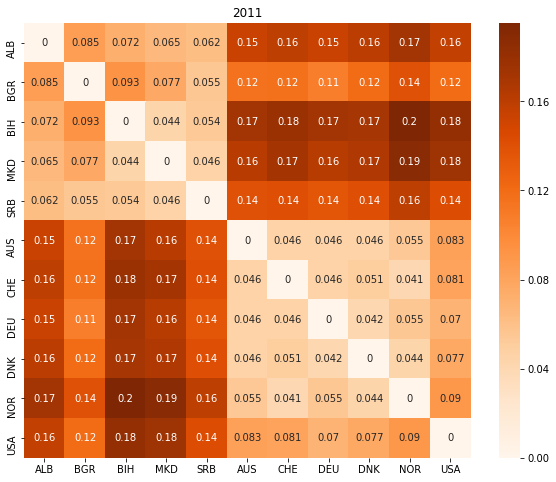

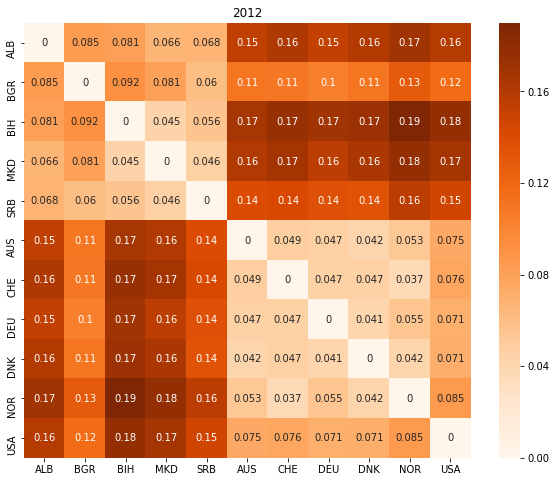

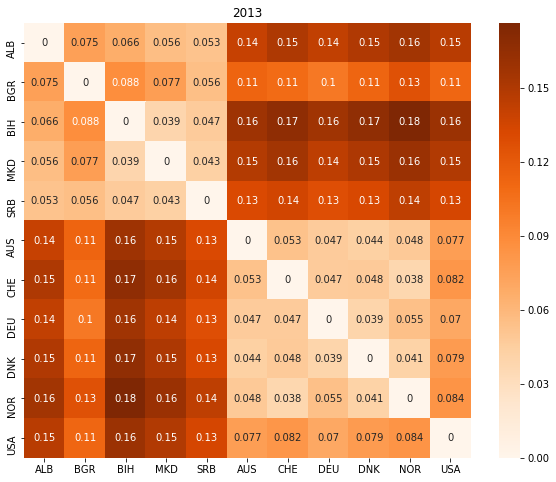

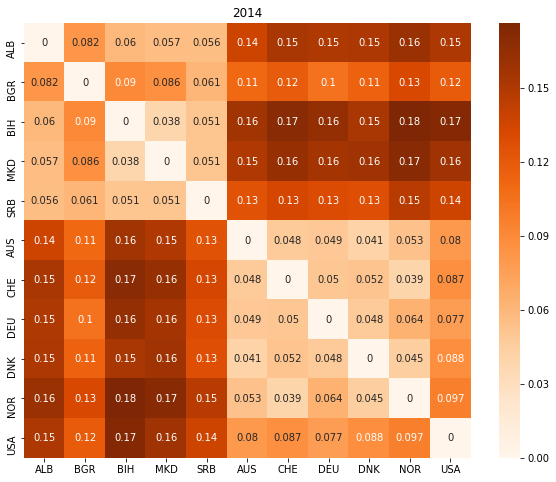

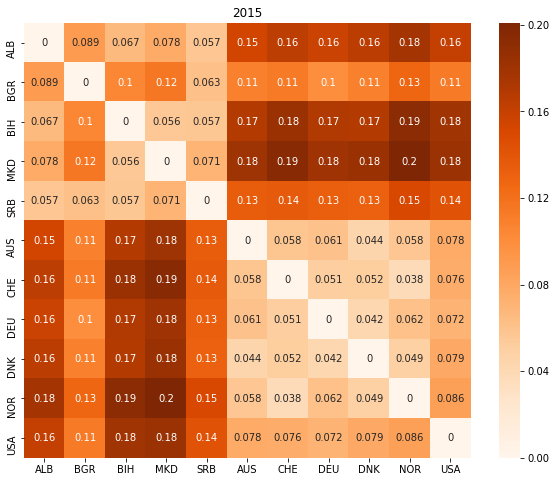

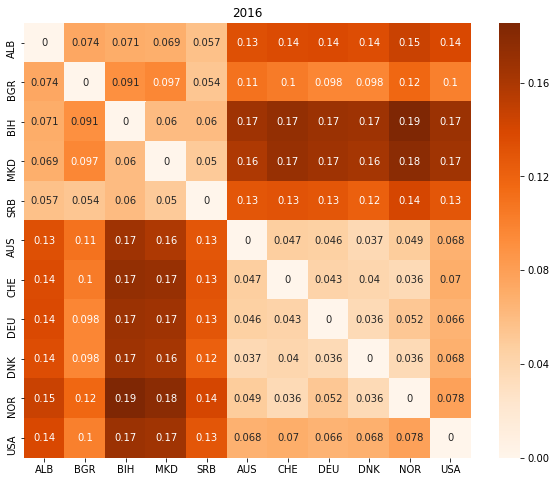

In [20]:
coi = ['ALB', 'BGR', 'BIH', 'MKD', 'SRB',
#        'GRC', 'SVN',
       'AUS', 'CHE', 'DEU', 'DNK', 'NOR', 'USA']

for year in years:
    plt.figure(figsize=(10, 8))
    seaborn.heatmap(w_mtx[year][coi].loc[coi], annot=True, cmap='Oranges')  # , vmin=0, vmax=0.6
    plt.title(f'{year}')
    plt.show()